In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import matplotlib.ticker as mticker
import pickle 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


plt.rc('font', family='Times New Roman', size=12)
plt.rc('xtick', labelsize=13) #fontsize of the x tick labels
plt.rc('ytick', labelsize=13) #fontsize of the y tick labels

In [2]:
x = np.arange(120, 281, 2)
y = np.arange(-30, 31, 1)

In [3]:
# import pickle
# save_dc = {'a':[y[::-1], alpha],
#  'b':maxTs,
#  'c':{'topo':[x, y, topo.T],
#       'sst':[x, y, sstAPMAM.T],
#       'wind':[x[::step[0]], y[::step[1]], winduPMAM.T[::step[1], ::step[0]], windvPMAM.T[::step[1], ::step[0]]]},
# 'd':{'topo':[x, y, topo.T],
#      'sst':[x, y, sstAPSON.T],
#      'wind':[x[::step[0]], y[::step[1]], winduPSON.T[::step[1], ::step[0]], windvPSON.T[::step[1], ::step[0]]]},
# 'poly': list(zip(xPara, yPara))
# }
# save_dc
with open('./data/Fig6data.pickle', 'rb') as handle:
    data = pickle.load(handle)


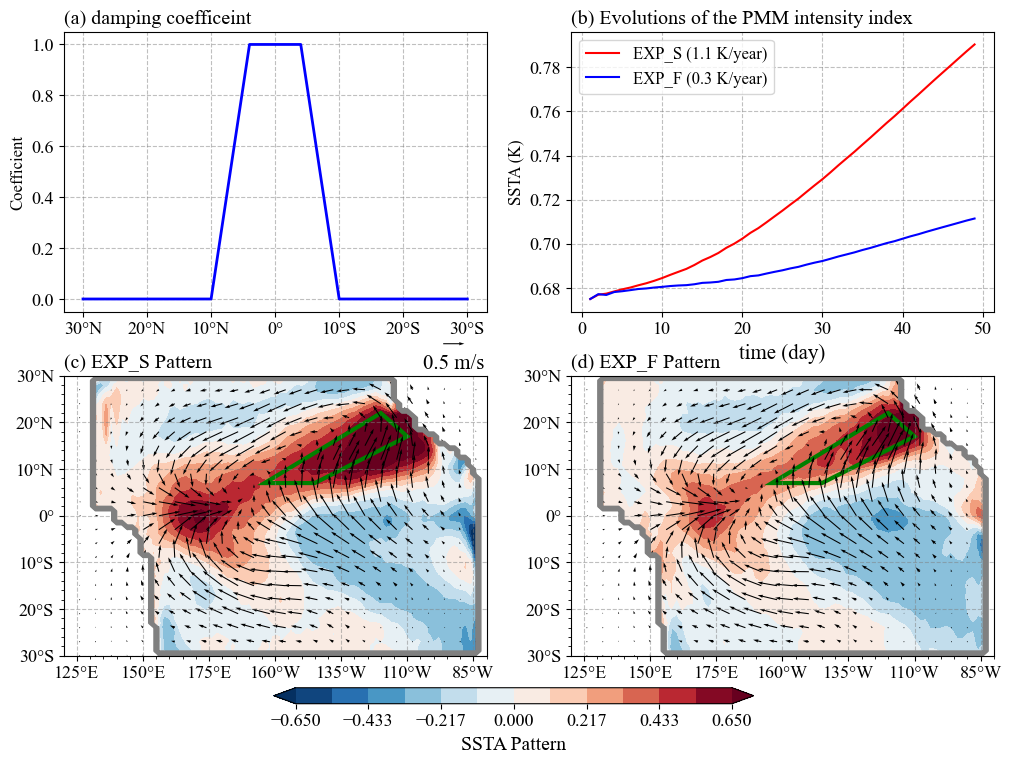

In [5]:
fig = plt.figure(figsize=(18/1.5, 12/1.5))
################################################################################################################
#
# Damping
#
################################################################################################################
data_a = data['a']
data_poly = data['poly']
ax = fig.add_subplot(221)
ax.plot(data_a[0], data_a[1], color="blue", linewidth=2)
# ax.set_xlabel("Latitude (°)")
ax.xaxis.set_major_formatter(LatitudeFormatter())

ax.set_ylabel("Coefficient")
ax.invert_xaxis()
ax.grid(linestyle="--", color="gray", alpha=0.5)
pos1 = ax.get_position()
# print(pos1)
pos2 = [pos1.x0, pos1.y0 + 0.050, pos1.width, pos1.height]
ax.set_position(pos2)
ax.set_title("(a) damping coefficeint",loc="left")
################################################################################################################
#
# MAM
#
################################################################################################################
data_c = data['c']
ax0 = fig.add_subplot(223)
data_c_sst = data_c['sst']
ax0.contourf(x, y, data_c_sst[2], extend="both", cmap="RdBu_r",
             levels=np.linspace(-0.65, 0.65, 13))
data_c_topo = data_c['topo']
ax0.contour(x, y,data_c_topo[2] , colors="0.5")
ax0.add_patch(mpathes.Polygon(xy=data_poly, fill=False, color="green", linewidth=3))
data_c_wind = data_c['wind']
ax0.grid(color='gray', alpha=0.5, linestyle="--")
Q = ax0.quiver(*data_c_wind,
               scale=10)
ax0.quiverkey(Q, 0.45, 0.54, 0.5, r'0.5 m/s', labelpos='S',coordinates='figure', fontproperties={'size': 15})
ax0.set_title("(c) EXP_S Pattern",loc='left')
pos1 = ax0.get_position()
# print(pos1)
pos2 = [pos1.x0, pos1.y0 + 0.040, pos1.width, pos1.height]
ax0.set_position(pos2)
# ax0.set_xlabel("Longitude (°)")
# ax0.set_ylabel("Latitude(°)")
ax0.yaxis.set_major_formatter(LatitudeFormatter())
ax0.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax0.minorticks_on()

################################################################################################################
#
# SON
#
################################################################################################################
ax1 = fig.add_subplot(224)
data_d = data['d']
data_d_sst = data_d['sst']
m0 = ax1.contourf(x, y, data_d_sst[2], extend="both", cmap="RdBu_r",
                  levels=np.linspace(-0.65, 0.65, 13))
ax1.contour(x, y, data_c_topo[2], colors="0.5")
ax1.add_patch(mpathes.Polygon(xy=data_poly, fill=False, color="green", linewidth=3))
ax1.grid(color='gray', alpha=0.5, linestyle="--")
ax1.quiver(*data_d['wind'],
           scale=10)

ax1.set_title("(d) EXP_F Pattern",loc='left')
pos1 = ax1.get_position()
# print(pos1)
pos2 = [pos1.x0, pos1.y0 + 0.040, pos1.width, pos1.height]
ax1.set_position(pos2)
# ax1.set_xlabel("Longitude (°)")
# ax1.set_ylabel("Latitude(°)")
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax1.minorticks_on()
################################################################################################################
#
# Time Series
#
################################################################################################################
data_b = data['b']
ax2 = fig.add_subplot(222)
ax2.plot(data_b[0], data_b[1][0], color="red", label="EXP_S (1.1 K/year)")
ax2.plot(data_b[0], data_b[1][1], color="blue", label="EXP_F (0.3 K/year)")
ax2.set_xlabel("time (day)",fontdict={"fontsize":15})
ax2.set_ylabel("SSTA (K)")
ax2.grid(linestyle="--", color="gray", alpha=0.5)
ax2.legend()
pos1 = ax2.get_position()
pos2 = [pos1.x0, pos1.y0 + 0.050, pos1.width, pos1.height]
ax2.set_position(pos2)
ax2.set_title("(b) Evolutions of the PMM intensity index",loc='left')
################################################################################################################
#
# ColorBar
#
################################################################################################################
ax_cb = fig.add_axes([0.3, 0.09, 0.40, 0.02])
cb = fig.colorbar(m0, cax=ax_cb, orientation="horizontal", spacing="proportional")
cb.set_label(r"SSTA Pattern", fontsize=14)
plt.savefig("./pic/Fig6.png",dpi=300)